August: Checking if the child mesh_mask for the no canyon bathymetry was created correctly.

In [1]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from salishsea_tools.nc_tools import scDataset

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_V

/home/imachuca/Canyons/runs_mackenzie_agrif/ideal_nocanyon/1_ideal_bathy_for_agrif_nocanyon.nc  
  
    dimensions:
	x = 244 ;
	y = 274 ;

/home/imachuca/Canyons/runs_mackenzie_agrif/ideal_nocanyon/1_mesh_mask_nocanyon.nc  
  
    dimensions:
	x = 244 ;
	y = 274 ;
    
/home/imachuca/Canyons/runs_mackenzie_agrif/ideal_nocanyon/AGRIF_FixedGrids.in    
    
    90 170 10 100 3 3 3 3

/home/imachuca/Canyons/results_mackenzie/idealized/nocanyon/agrif_255x190_fin/1_mesh_mask_0000.nc 
    
    dimensions:
	x = 123 ;
	y = 138 ;
	z = 80 ;
       
    global attributes:
		:DOMAIN_number_total = 4 ;
		:DOMAIN_number = 0 ;
		:DOMAIN_dimensions_ids = 1, 2 ;
		:DOMAIN_size_global = 244, 274 ;
		:DOMAIN_size_local = 123, 138 ;
		:DOMAIN_position_first = 1, 1 ;
		:DOMAIN_position_last = 123, 138 ;
		:DOMAIN_halo_size_start = 0, 0 ;
		:DOMAIN_halo_size_end = 1, 1 ;
		:DOMAIN_type = "BOX" ;

/home/imachuca/Canyons/results_mackenzie/idealized/nocanyon/agrif_255x190_fin/1_mesh_mask_0001.nc 
    
    dimensions:
        x = 123 ;
        y = 138 ;
        z = 80 ;
        t = UNLIMITED ; // (1 currently)

    global attributes:
		:DOMAIN_number_total = 4 ;
		:DOMAIN_number = 1 ;
		:DOMAIN_dimensions_ids = 1, 2 ;
		:DOMAIN_size_global = 244, 274 ;
		:DOMAIN_size_local = 123, 138 ;
		:DOMAIN_position_first = 122, 1 ;
		:DOMAIN_position_last = 244, 138 ;
		:DOMAIN_halo_size_start = 1, 0 ;
		:DOMAIN_halo_size_end = 0, 1 ;
		:DOMAIN_type = "BOX" ;

/home/imachuca/Canyons/results_mackenzie/idealized/nocanyon/agrif_255x190_fin/1_mesh_mask_0002.nc 

    global attributes:
		:DOMAIN_number_total = 4 ;
		:DOMAIN_number = 2 ;
		:DOMAIN_dimensions_ids = 1, 2 ;
		:DOMAIN_size_global = 244, 274 ;
		:DOMAIN_size_local = 123, 138 ;
		:DOMAIN_position_first = 1, 137 ;
		:DOMAIN_position_last = 123, 274 ;
		:DOMAIN_halo_size_start = 0, 1 ;
		:DOMAIN_halo_size_end = 1, 0 ;
		:DOMAIN_type = "BOX" ;

/home/imachuca/Canyons/results_mackenzie/idealized/nocanyon/agrif_255x190_fin/1_mesh_mask_0003.nc

    global attributes:
		:DOMAIN_number_total = 4 ;
		:DOMAIN_number = 3 ;
		:DOMAIN_dimensions_ids = 1, 2 ;
		:DOMAIN_size_global = 244, 274 ;
		:DOMAIN_size_local = 123, 138 ;
		:DOMAIN_position_first = 122, 137 ;
		:DOMAIN_position_last = 244, 274 ;
		:DOMAIN_halo_size_start = 1, 1 ;
		:DOMAIN_halo_size_end = 0, 0 ;
		:DOMAIN_type = "BOX" ;
        
solution: nemo combine mackenzie03_ideal_agrif_nocanyon.yaml

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepv, vmask, mbathy, e1v, e3v_0 = functions_transport_V.get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepv_nc, vmask_nc, mbathy_nc, e1v_nc, e3v_0_nc = functions_transport_V.get_variables_planes(dirname, filename)

In [3]:
mbathy.shape, mbathy_nc.shape, vmask.shape, vmask_nc.shape

((272, 242), (272, 242), (80, 272, 242), (80, 272, 242))

In [4]:
ind_plane, ind_shelf, ind_bottom, ind_axis, ind_rimW, ind_rimE, ind_half, ind_shfW, ind_shfE,\
depth_shelf, depth_bottom, depth_half, area_j = functions_transport_V.get_indices_V(gdepv, vmask, mbathy, e1v, e3v_0)

ind_plane 178
ind_shelf 10
depth_shelf 91.875
ind_bottom 60
depth_bottom 534.672
ind_axis 110
ind_rimW 48
ind_rimE 172
ind_half 25
depth_half 223.125
ind_shfW 5
ind_shfE 215


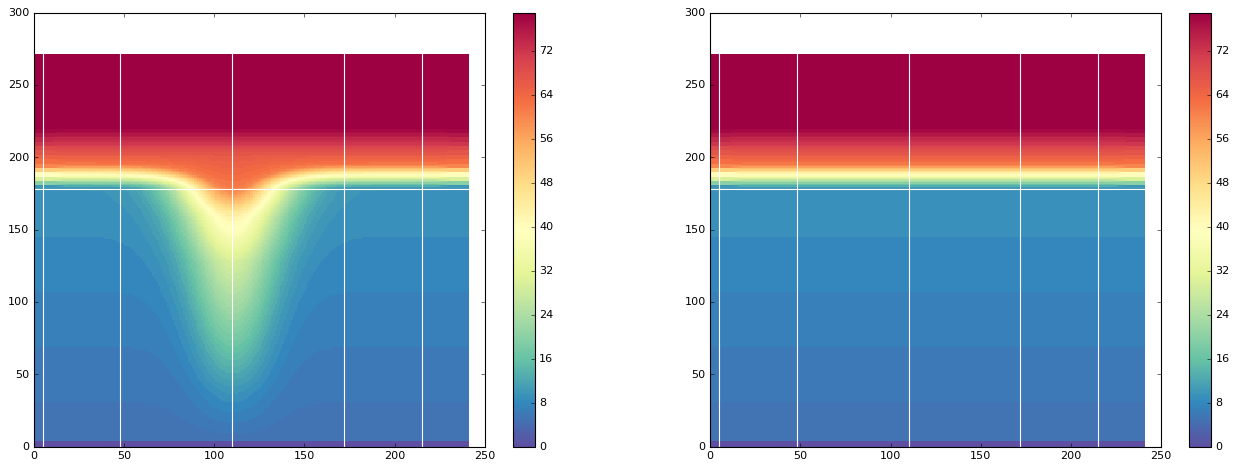

In [5]:
xs = np.arange(mbathy.shape[-1])
ys = np.arange(mbathy.shape[-2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
p1 = ax1.pcolormesh(xs, ys, mbathy, cmap=cm.Spectral_r)
p2 = ax2.pcolormesh(xs, ys, mbathy_nc, cmap=cm.Spectral_r)
fig.colorbar(p1, ax=ax1); fig.colorbar(p2, ax=ax2)
for ax in [ax1, ax2]:
    ax.axhline(ind_plane, c='white')
    ax.axvline(ind_axis, c='white')
    ax.axvline(ind_rimW, c='white')
    ax.axvline(ind_rimE, c='white')
    ax.axvline(ind_shfW, c='white')
    ax.axvline(ind_shfE, c='white')

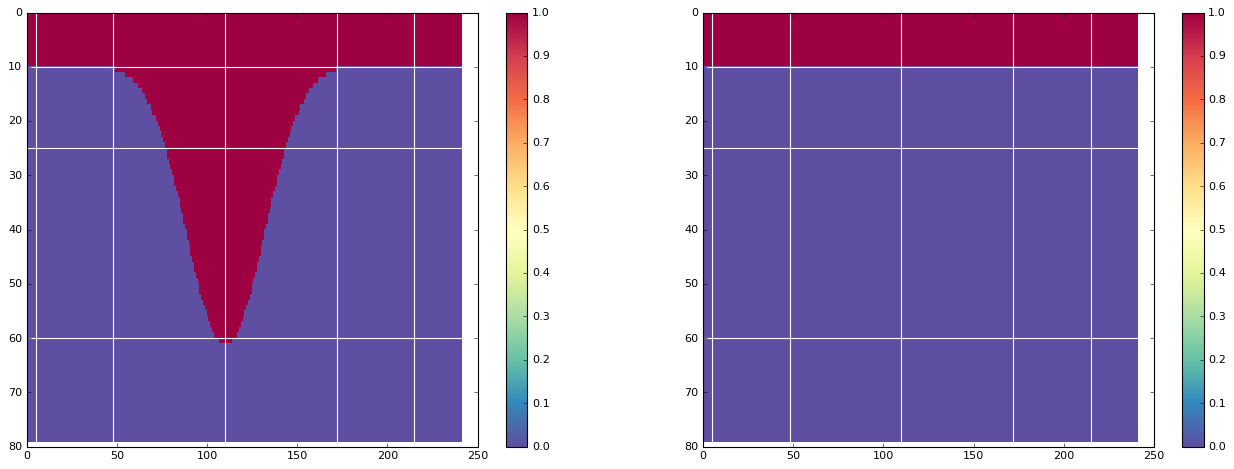

In [6]:
zs = np.arange(vmask.shape[-3])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
p1 = ax1.pcolormesh(xs, zs, vmask[:, ind_plane, :], cmap=cm.Spectral_r)
p2 = ax2.pcolormesh(xs, zs, vmask_nc[:, ind_plane, :], cmap=cm.Spectral_r)
fig.colorbar(p1, ax=ax1); fig.colorbar(p2, ax=ax2)
for ax in [ax1, ax2]:
    ax.invert_yaxis()
    ax.axhline(ind_shelf, c='white')
    ax.axhline(ind_bottom, c='white')
    ax.axvline(ind_axis, c='white')
    ax.axvline(ind_rimW, c='white')
    ax.axvline(ind_rimE, c='white')
    ax.axhline(ind_half, c='white')
    ax.axvline(ind_shfW, c='white')
    ax.axvline(ind_shfE, c='white')

In [7]:
mbathy_diff = mbathy - mbathy_nc
vmask_diff = vmask[:, ind_plane, :] - vmask_nc[:, ind_plane, :]

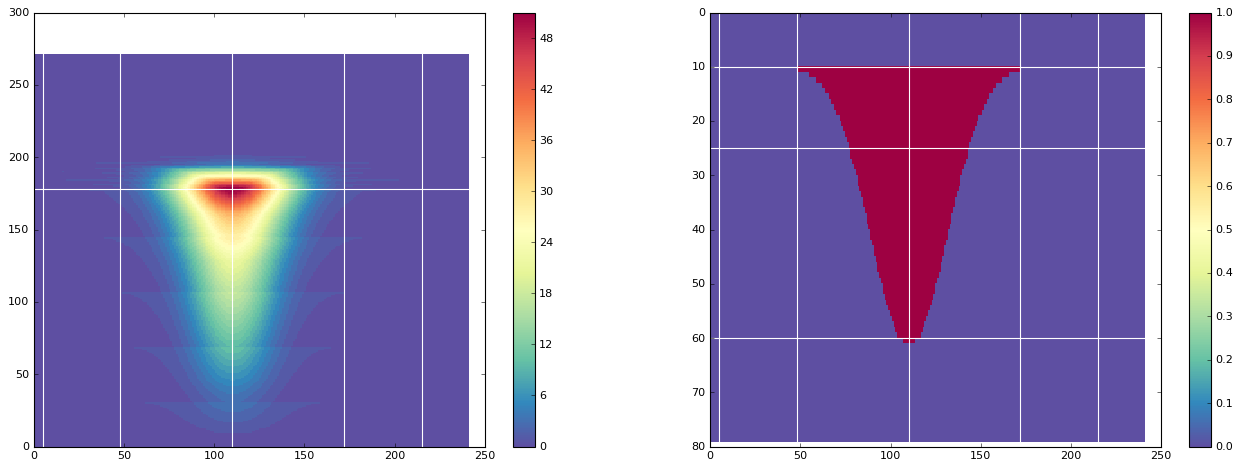

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
p1 = ax1.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r)
p2 = ax2.pcolormesh(xs, zs, vmask_diff, cmap=cm.Spectral_r)
fig.colorbar(p1, ax=ax1); fig.colorbar(p2, ax=ax2)
ax2.invert_yaxis()
for ax in [ax1, ax2]:
    ax.axvline(ind_axis, c='white')
    ax.axvline(ind_rimW, c='white')
    ax.axvline(ind_rimE, c='white')
    ax.axvline(ind_shfW, c='white')
    ax.axvline(ind_shfE, c='white')
ax1.axhline(ind_plane, c='white')
ax2.axhline(ind_shelf, c='white')
ax2.axhline(ind_bottom, c='white')
ax2.axhline(ind_half, c='white')


In [9]:
bathy = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')['Bathymetry']
bathyn = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif_nocanyon.nc')['Bathymetry']

In [10]:
x_axis = int(bathy.shape[-1]*0.5)
x_slope = 10
x_rim = 115

axis = bathy[:, x_axis]
slope = bathy[:, x_slope]
rim = bathy[:, x_rim]

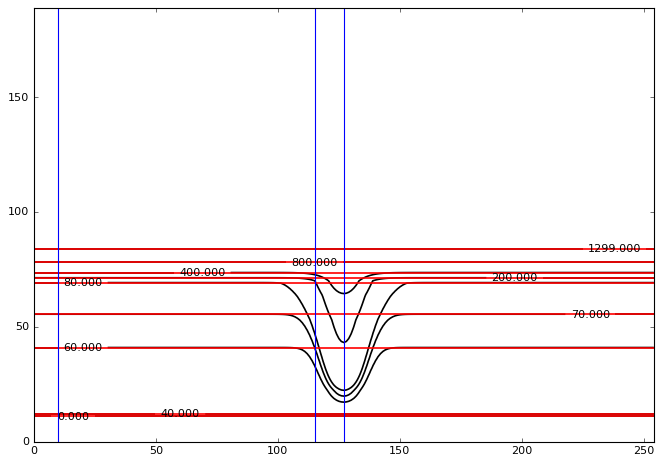

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
c = ax.contour(bathy[:,:], levels = [0, 40, 60, 70, 80, 200, 400, 800, 1299], colors='k', linewidths=1.5)
cn = ax.contour(bathyn[:,:], levels = [0, 40, 60, 70, 80, 200, 400, 800, 1299], colors='r', linewidths=1.5)
ax.clabel(c, inline=1, fontsize=10)

ax.axvline(x_axis, c='b')
ax.axvline(x_slope, c='b')
ax.axvline(x_rim, c='b')

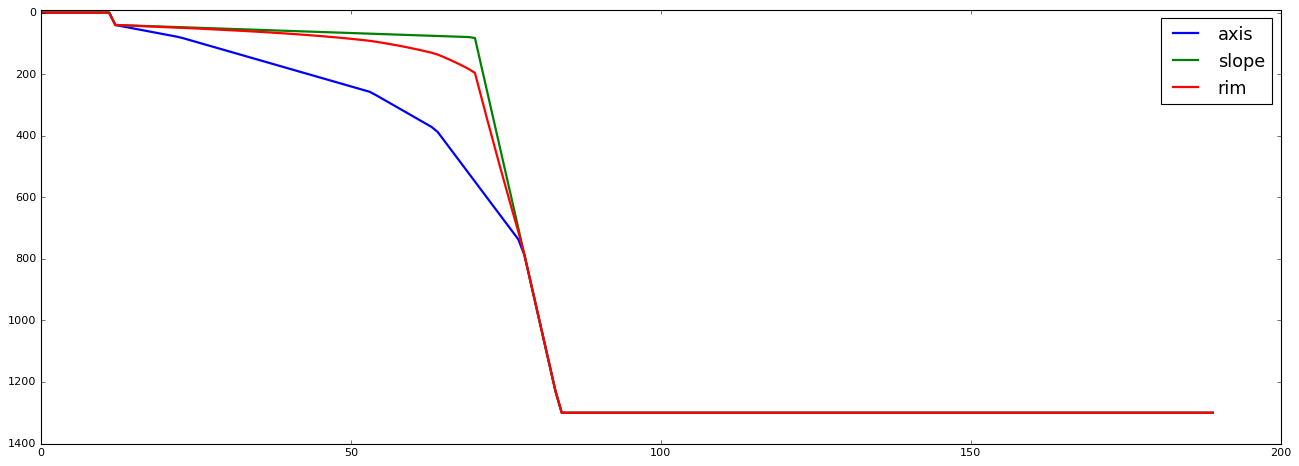

In [12]:
fig, ax = plt.subplots(1,1,figsize=(20, 7))
ax.plot(axis, linewidth=2, label='axis')
ax.plot(slope, linewidth=2, label='slope')
ax.plot(rim, linewidth=2, label='rim')
ax.set_ylim(1400, -10)
ax.legend(fontsize=16)